# Regression Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/AB_NYC_2019.csv")
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

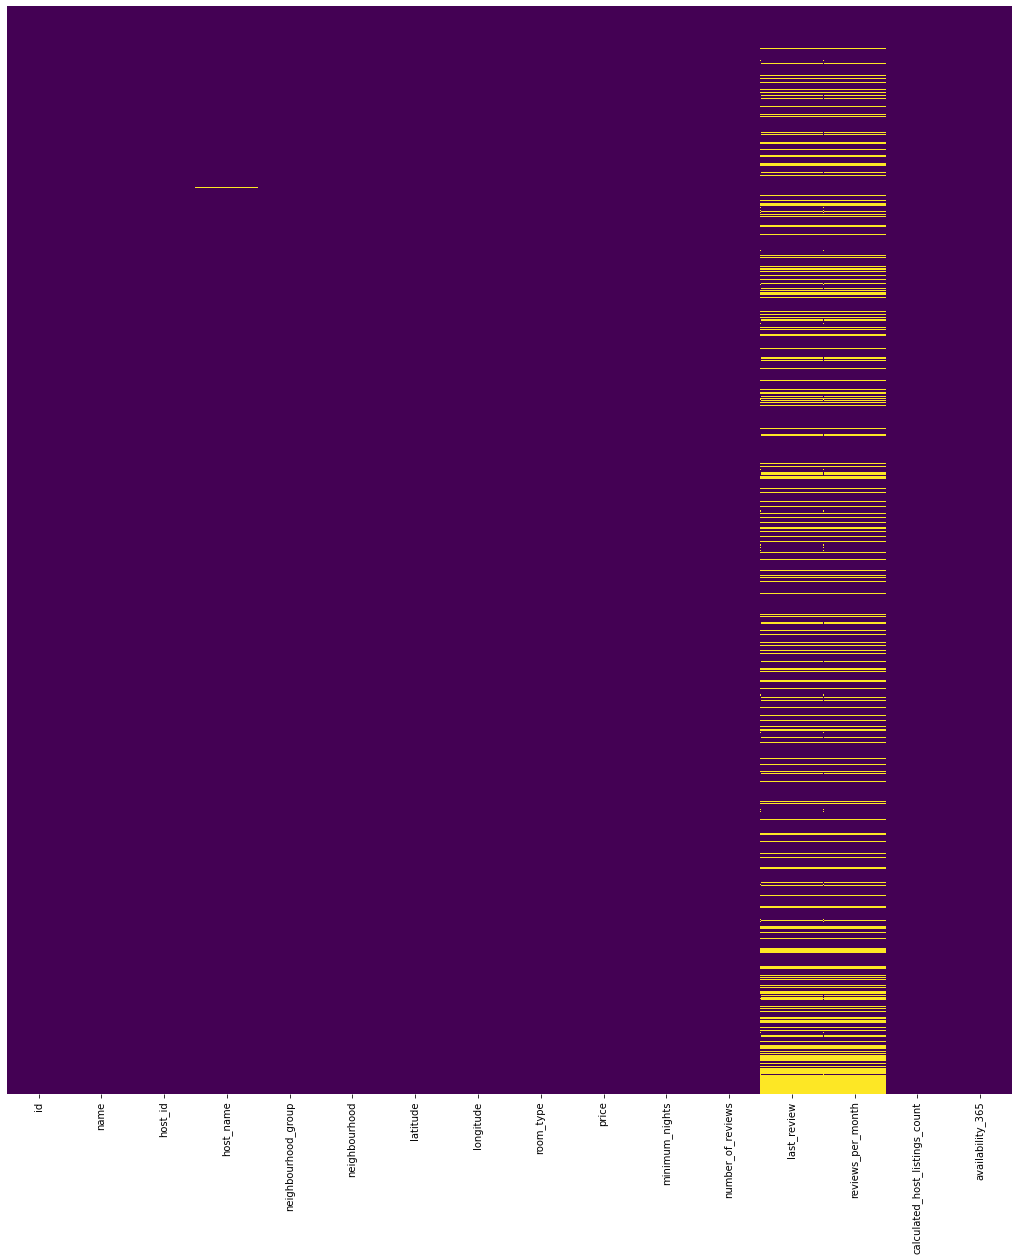

In [4]:
plt.figure(figsize = (18,20))
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap = 'viridis')

In [5]:
drop = df.drop(['id', 'name', 'host_name', 'last_review'], axis = 1, inplace = True)
df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


In [6]:
df.reviews_per_month = df.reviews_per_month.fillna(0)
df.head(1)

,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365


In [7]:
df.isnull().sum()

host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

Index(['host_id', 'neighbourhood_group', 'neighbourhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')

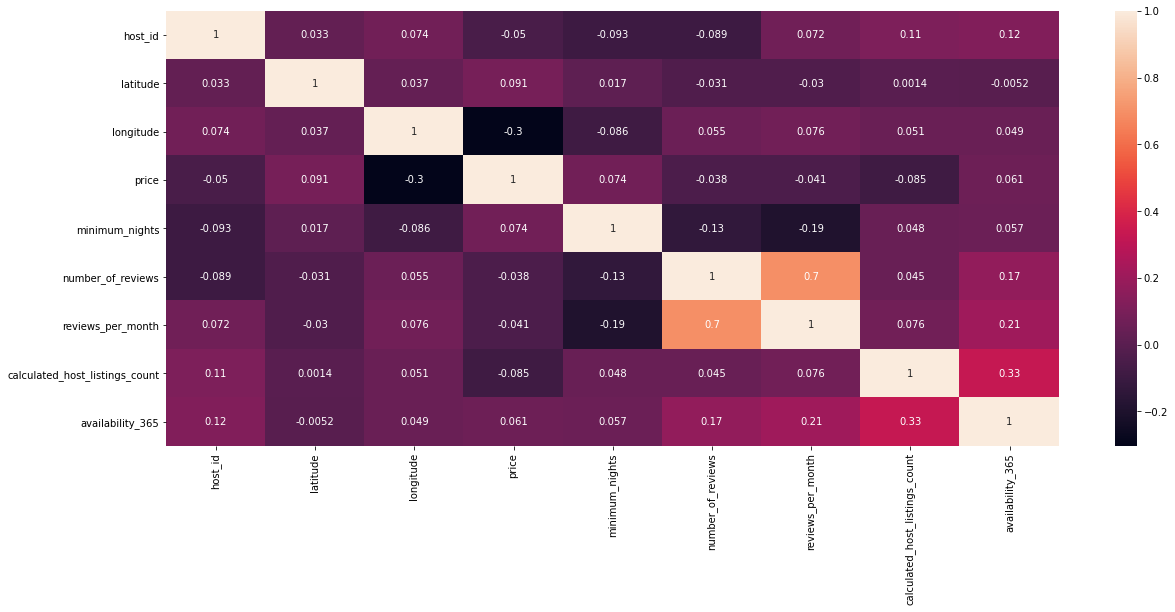

In [8]:
# CO-RELATION B/W DIFFERENT VARIABLES #
corr = df.corr(method = 'kendall')
plt.figure(figsize = (20,8))
sns.heatmap(corr, annot = True)
df.columns

In [9]:
columns = df['neighbourhood_group'].unique()
columns

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

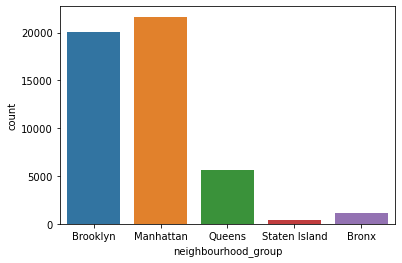

In [10]:
sns.countplot('neighbourhood_group', data = df)

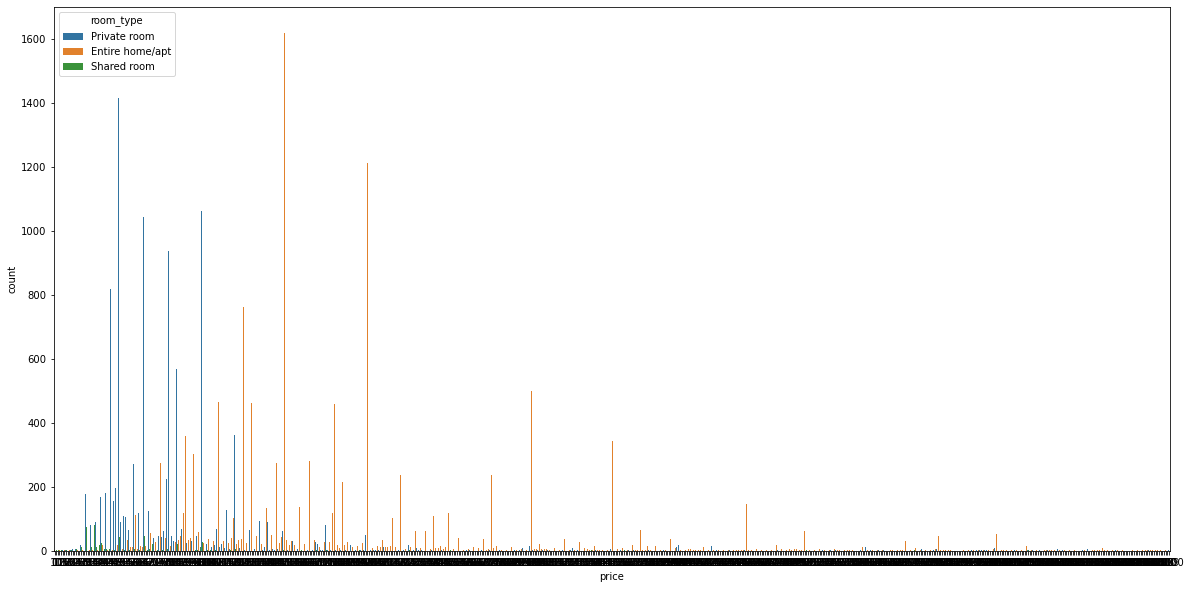

In [11]:
plt.figure(figsize=(20,10))
sns.countplot('price',hue = 'room_type', data = df)

Text(0.5, 1.0, 'Types of rooms available in AIRBNB')

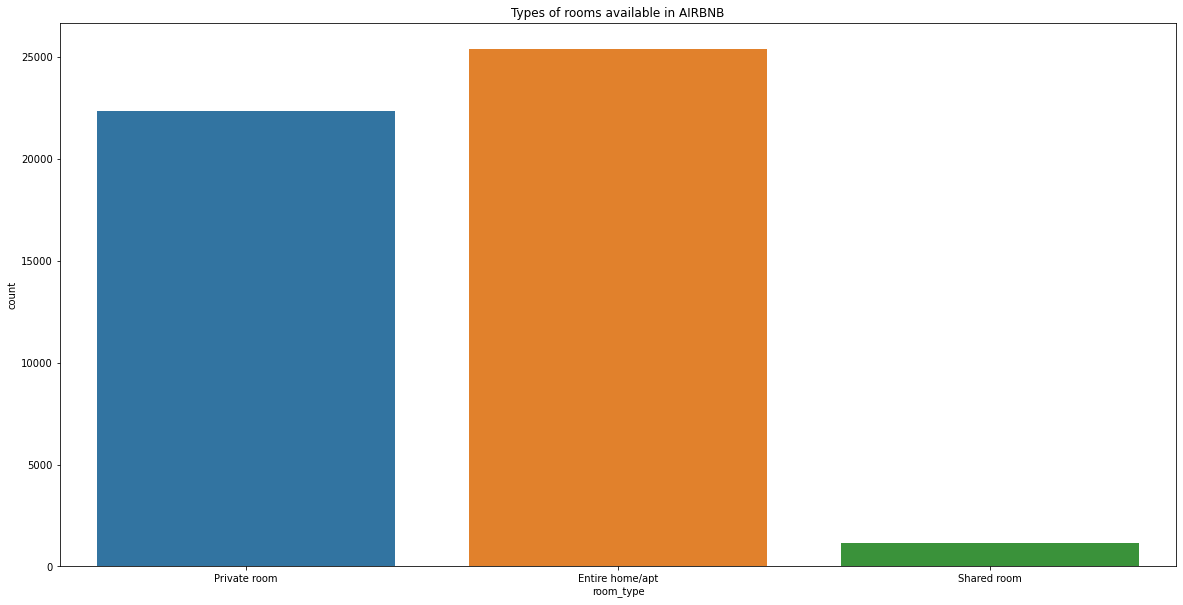

In [12]:
plt.figure(figsize=(20,10))
sns.countplot('room_type', data = df)
plt.title("Types of rooms available in AIRBNB")

In [15]:
import cufflinks as cf

ModuleNotFoundError: No module named 'cufflinks'

In [ ]:
cf.go_offline()

In [ ]:
df["room_type"].iplot(kind = 'hist', bins = 50)

In [ ]:
plt.figure(figsize = (20,10))
plt.title("Availability of rooms in specific neigbourhood")
sns.boxplot(x = 'neighbourhood_group', y = 'availability_365', data = df)

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot('longitude', 'latitude', hue = 'neighbourhood_group', data = df)

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot('longitude', 'latitude', hue = 'room_type', data = df)

In [ ]:
plt.figure(figsize = (10,6))
sns.scatterplot('longitude', 'latitude', hue = 'availability_365', data = df)

In [ ]:
drop1 = df.drop(['host_id', 'latitude', 'longitude', 'number_of_reviews', 'reviews_per_month'], axis = 1, inplace = True)
df.head(5)

In [ ]:
df['room_type'] = pd.get_dummies(df['room_type'])

In [ ]:
df['neighbourhood'] = pd.get_dummies(df['neighbourhood'])

In [ ]:
df['neighbourhood_group'] = pd.get_dummies(df['neighbourhood_group'])

In [ ]:
df.head(2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x = df.iloc[:,[0,1,2,4,5,6]]
y = df['price']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 1/3)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn import metrics

# LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")

In [ ]:
r2_score(y_test,prediction)

# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lr = KNeighborsClassifier()
lr.fit(x_train, y_train)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")

In [ ]:
r2_score(y_test,prediction)

# DECISION TREE CLASSIFIER

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr = DecisionTreeClassifier()
lr.fit(x_train, y_train)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")

In [ ]:
r2_score(y_test,prediction)

# RANDOM FOREST CLASSIFIER

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
lr = RandomForestClassifier()
lr.fit(x_train, y_train)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")

In [ ]:
r2_score(y_test,prediction)

# SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.svm import SVC

In [ ]:
lr = SVC()
lr.fit(x_train, y_train)

In [ ]:
prediction = lr.predict(x_test)

In [ ]:
score = round((lr.score(x_test, y_test)*100),2)
print("\nModel Score:",score,"%")

In [ ]:
r2_score(y_test,prediction)

* AS PER TO THE R^2 VALUE CONISDERED FROM ALL THE REGRESSORS AND CLASSIFIERS, LINEAR REGRESSION GOT THE MINIMAL ERROR.

# Deep Learning Analysis

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import SGD

In [ ]:
df_tensor = pd.read_csv("G:/Education/Machine Learning/ML_DATA_FILES/AB_NYC_2019.csv")
df_tensor.head()

In [ ]:
df_tensor.drop(columns=['id', 'name', 'host_id', 'host_name', 'latitude', 'longitude', 'last_review', 'number_of_reviews', 'reviews_per_month'], axis = 1, inplace = True)
df_tensor.head()

In [ ]:
df_tensor.isnull().sum()

In [ ]:
df_tensor['neighbourhood_group'] = pd.get_dummies(df_tensor['neighbourhood_group'])
df_tensor['neighbourhood'] = pd.get_dummies(df_tensor['neighbourhood'])
df_tensor['room_type'] = pd.get_dummies(df_tensor['room_type'])

In [ ]:
df_tensor.head(3)

In [ ]:
x = df_tensor.drop(['price'], axis = 1)
y = df_tensor['price']

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [ ]:
scaler.fit(x_train)

In [ ]:
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

In [ ]:
classifier = Sequential()

In [ ]:
classifier.add(Dense(units = 64, input_dim = 6, activation = 'linear'))

In [ ]:
classifier.add(Dense(units = 32, activation = 'linear'))

In [ ]:
classifier.add(Dense(units = 1, activation = 'linear'))

In [ ]:
classifier.compile(optimizer='adam', loss = 'mse', metrics = ['accuracy'])

In [ ]:
history = classifier.fit(x_train, y_train, epochs = 10)

In [ ]:
classifier.predict(scaler.transform([[0, 0, 0, 1, 6, 365]]))

### The actual price of the stay is 149USD whereas the predicted value is 129USD

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
pred_train= classifier.predict(x_train)
print(np.sqrt(mean_squared_error(y_train,pred_train)))

pred= classifier.predict(x_test)
print(np.sqrt(mean_squared_error(y_test,pred))) 

In [ ]:
prediction = classifier.predict(x_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, r2_score
from sklearn import metrics

In [ ]:
r2_score(y_test,prediction)